
## Introduction to Beta





$$\beta_i = \frac{\mathrm{Cov}(R_i, R_m)}{\mathrm{Var}(R_m)}$$



In [1]:
import yfinance as yf

yf.set_config(proxy="http://127.0.0.1:8118") 

In [10]:
import json
from rich import print


with open('stocks.json') as fh:
    data = json.load(fh)
print(data)



{
    'typical_sse_stocks': [
        {'code': '601318', 'name_en': 'Ping An Insurance', 'name_cn': '中国平安'},
        {'code': '600519', 'name_en': 'Kweichow Moutai', 'name_cn': '贵州茅台'},
        {'code': '601398', 'name_en': 'Industrial and Commercial Bank of China (ICBC)', 'name_cn': '工商银行'},
        {'code': '601857', 'name_en': 'PetroChina', 'name_cn': '中国石油'},
        {'code': '600036', 'name_en': 'China Merchants Bank', 'name_cn': '招商银行'},
        {'code': '600050', 'name_en': 'China Unicom', 'name_cn': '中国联通'},
        {'code': '601088', 'name_en': 'China Shenhua Energy', 'name_cn': '中国神华'},
        {'code': '600887', 'name_en': 'Yili Industrial Group', 'name_cn': '伊利股份'},
        {'code': '600030', 'name_en': 'CITIC Securities', 'name_cn': '中信证券'},
        {'code': '600048', 'name_en': 'Poly Developments and Holdings', 'name_cn': '保利发展'}
    ],
    'exchange_note': "Codes starting with '60' are Shanghai Stock Exchange (SSE) A-shares."
}

In [11]:
symbols = [e['code']+'.SS' for e in data['typical_sse_stocks']] + ['000001.SS']
symbols

['601318.SS',
 '600519.SS',
 '601398.SS',
 '601857.SS',
 '600036.SS',
 '600050.SS',
 '601088.SS',
 '600887.SS',
 '600030.SS',
 '600048.SS',
 '000001.SS']

In [12]:
df = yf.download(
        symbols,
        period="5Y", auto_adjust=False
    )
df.tail()

[*********************100%***********************]  11 of 11 completed


Price         Adj Close                                            \
Ticker        000001.SS  600030.SS  600036.SS 600048.SS 600050.SS   
Date                                                                
2025-09-24  3853.642090  28.690001  41.320000      7.66      5.48   
2025-09-25  3853.302002  28.709999  40.820000      7.66      5.45   
2025-09-26  3828.105957  28.719999  40.799999      7.72      5.41   
2025-09-29  3862.531982  30.410000  40.680000      7.72      5.46   
2025-09-30  3882.777100  29.900000  40.410000      7.86      5.50   

Price                                                               ...  \
Ticker        600519.SS  600887.SS  601088.SS  601318.SS 601398.SS  ...   
Date                                                                ...   
2025-09-24  1442.000000  27.410000  38.950001  55.290001      7.47  ...   
2025-09-25  1439.000000  26.969999  38.720001  55.090000      7.38  ...   
2025-09-26  1435.000000  27.260000  38.759998  55.220001      7.41  ...   
2025-09-29  1460.859985  27.190001  38.349998  56.009998      7.33  ...   
2025-09-30  1443.989990  27.280001  38.500000  55.110001      7.30  ...   

Price          Volume                                                      \
Ticker      600030.SS 600036.SS  600048.SS  600050.SS 600519.SS 600887.SS   
Date                                                                        
2025-09-24  155819804  64389951  146177628  298152931   3074350  34535229   
2025-09-25  132806322  66694887  142392293  240078271   3386973  76402476   
2025-09-26  126643060  68276667  215922863  216846109   4512071  63875432   
2025-09-29  593771449  83555055  162946345  285806545   5368403  57659118   
2025-09-30  295038797  70002520  250893219  316034123   3936362  50527646   

Price                                                  
Ticker     601088.SS  601318.SS  601398.SS  601857.SS  
Date                                                   
2025-09-24  28500609   50317433  514206919  139825895  
2025-09-25  19818486   51429616  323722840  101110481  
2025-09-26  21539186   54862187  273359298  109092921  
2025-09-29  32027805  103510992  405003933  157210459  
2025-09-30  23886334   76708187  244567627  167463098  

[5 rows x 66 columns]

In [13]:
df_unstacked = df.unstack()
df_unstacked

Price      Ticker     Date      
Adj Close  000001.SS  2020-09-30    3.218052e+03
                      2020-10-09    3.272076e+03
                      2020-10-12    3.358465e+03
                      2020-10-13    3.359750e+03
                      2020-10-14    3.340778e+03
                                        ...     
Volume     601857.SS  2025-09-24    1.398259e+08
                      2025-09-25    1.011105e+08
                      2025-09-26    1.090929e+08
                      2025-09-29    1.572105e+08
                      2025-09-30    1.674631e+08
Length: 80058, dtype: float64

In [14]:
ticker_price = df_unstacked.loc['Adj Close']
ticker_price

Ticker     Date      
000001.SS  2020-09-30    3218.052002
           2020-10-09    3272.075928
           2020-10-12    3358.465088
           2020-10-13    3359.750000
           2020-10-14    3340.778076
                            ...     
601857.SS  2025-09-24       8.130000
           2025-09-25       8.140000
           2025-09-26       8.160000
           2025-09-29       8.170000
           2025-09-30       8.060000
Length: 13343, dtype: float64

In [16]:
import pandas as pd

ticker_ret = []
for symbol in symbols:
    ret = ticker_price.loc[symbol].sort_index().pct_change().fillna(0.)
    ret = ret.resample('ME').apply(lambda x: (1+x).prod() - 1)
    doc = pd.DataFrame({'symbol': symbol, 'ret': ret}, index=ret.index)
    doc.reset_index(inplace=True)
    doc.columns = ['date', 'symbol', 'ret']
    ticker_ret.append(doc)

ticker_ret = pd.concat(ticker_ret)
ticker_ret.set_index(['symbol', 'date'], inplace=True)
ticker_ret.sort_index(inplace=True)
ticker_ret = ticker_ret['ret']
ticker_ret

symbol     date      
000001.SS  2020-09-30    0.000000
           2020-10-31    0.002014
           2020-11-30    0.051861
           2020-12-31    0.023973
           2021-01-31    0.002879
                           ...   
601857.SS  2025-05-31    0.037547
           2025-06-30    0.060966
           2025-07-31    0.037427
           2025-08-31   -0.016911
           2025-09-30   -0.051537
Name: ret, Length: 671, dtype: float64

In [17]:
# cov between maotai and shanghai composite index
cov_maotai_shanghai = ticker_ret.loc["600519.SS"].cov(ticker_ret.loc["000001.SS"])
print(f"Covariance between Kweichow Moutai and Shanghai Composite Index: {cov_maotai_shanghai}")


Covariance between Kweichow Moutai and Shanghai Composite Index: 0.0022085612851726034

In [18]:
# var of shanghai composite index
var_shanghai = ticker_ret.loc["000001.SS"].var()
print(f"Variance of Shanghai Composite Index: {var_shanghai}")

Variance of Shanghai Composite Index: 0.0018543867456467225

In [19]:
# cov over var of shanghai composite index
cov_maotai_shanghai_over_var_shanghai = cov_maotai_shanghai / var_shanghai
print(f"Covariance between Kweichow Moutai and Shanghai Composite Index over Variance of Shanghai Composite Index: {cov_maotai_shanghai_over_var_shanghai}")

Covariance between Kweichow Moutai and Shanghai Composite Index over Variance of Shanghai Composite Index: 
1.1909928122368894

In [20]:
import pandas as pd
import statsmodels.api as sm


docs = []
for e in data['typical_sse_stocks']:
    code = e['code']
    corr = ticker_ret.loc[code+'.SS'].corr(ticker_ret.loc["000001.SS"])
    cov = ticker_ret.loc[code+'.SS'].cov(ticker_ret.loc["000001.SS"])
    beta = cov / var_shanghai
    
    ols = sm.OLS(ticker_ret.loc[code+'.SS'], sm.add_constant(ticker_ret.loc["000001.SS"])).fit()

    alpha_ols = ols.params['const']
    beta_ols = ols.params['ret']
    
    docs.append({
        "code": code,
        "name": e['name_en'],
        "corr": corr,
        "cov": cov,
        "beta_eq": beta,
        "beta_ols": beta_ols,
        "alpha_ols": alpha_ols,
    })
df_stat = pd.DataFrame(docs)
df_stat

,code,name,corr,cov,beta_eq,beta_ols,alpha_ols
0,601318,Ping An Insurance,0.671306,0.002374,1.279997,1.279997,-0.003607
1,600519,Kweichow Moutai,0.614699,0.002209,1.190993,1.190993,-0.001724
2,601398,Industrial and Commercial Bank of China (ICBC),0.162490,0.000248,0.133680,0.133680,0.011078
3,601857,PetroChina,0.244359,0.000905,0.487983,0.487983,0.016814
4,600036,China Merchants Bank,0.573036,0.002078,1.120571,1.120571,0.004520
5,600050,China Unicom,0.544914,0.001766,0.952269,0.952269,0.002888
6,601088,China Shenhua Energy,0.175552,0.000572,0.308473,0.308473,0.021646
7,600887,Yili Industrial Group,0.616864,0.002020,1.089498,1.089498,-0.004450
8,600030,CITIC Securities,0.738100,0.002757,1.486866,1.486866,0.000103
9,600048,Poly Developments and Holdings,0.499198,0.002282,1.230452,1.230452,-0.007775


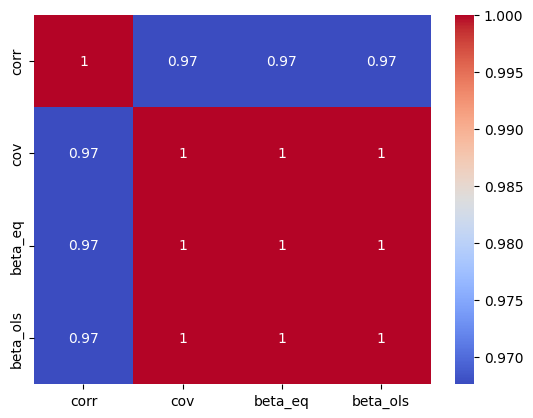

In [21]:
# plot the heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_stat[['corr', 'cov', 'beta_eq', 'beta_ols']].corr(), annot=True, cmap='coolwarm')
plt.show()

$$E(R_i) = R_f + \beta_i \times (E(R_m) - R_f)$$

In [29]:
import akshare as ak

rate_interbank_df = ak.rate_interbank(market="上海银行同业拆借市场", symbol="Shibor人民币", indicator="3月")
rate_interbank_df.columns = ["date", "rate", "pct_change"]
rate_interbank_df['rate'] /= 100
rate_interbank_df['pct_change'] /= 100
rate_interbank_df['date'] = pd.to_datetime(rate_interbank_df['date'])
rate_interbank_df.set_index("date", inplace=True)
rate_interbank_df.head()


  0%|          | 0/10 [00:00<?, ?it/s]

,rate,pct_change
date,,
2006-10-08,0.026110,0.0000
2006-10-09,0.026248,0.0138
2006-10-10,0.026325,0.0077
2006-10-11,0.026338,0.0013
2006-10-12,0.026380,0.0042


In [30]:
date = ticker_ret.reset_index()['date']
date_min = date.min()
date_max = date.max()
date_max, date_min


(Timestamp('2025-09-30 00:00:00'), Timestamp('2020-09-30 00:00:00'))

In [33]:
rf = rate_interbank_df['rate'].loc[date_min.strftime('%Y-%m-%d'):date_max.strftime('%Y-%m-%d')]
rf


date
2020-09-30    0.02691
2020-10-09    0.02708
2020-10-10    0.02715
2020-10-12    0.02722
2020-10-13    0.02734
               ...   
2025-09-25    0.01574
2025-09-26    0.01576
2025-09-28    0.01580
2025-09-29    0.01580
2025-09-30    0.01580
Name: rate, Length: 1248, dtype: float64

<Axes: title={'center': 'Risk Free Rate'}, xlabel='date'>

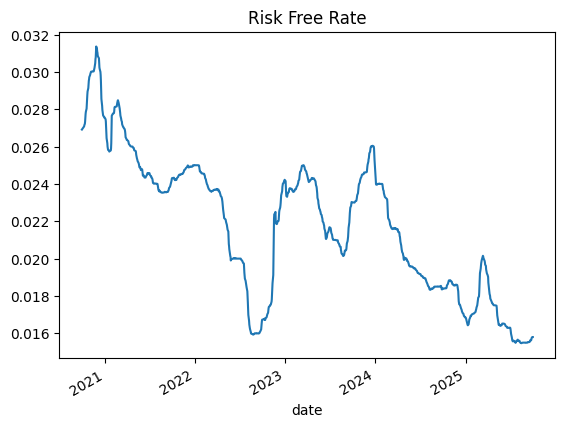

In [35]:
# plot the rf with title "Risk Free Rate"
rf.plot(title="Risk Free Rate")


In [36]:
# rm annual 
rm = (1+ticker_ret.loc["000001.SS"].mean()) ** 12 - 1
rm

np.float64(0.04868943582548346)

In [40]:
df_stat['expected_return'] = rf.mean() + df_stat['beta_eq'] * (rm - rf.mean())

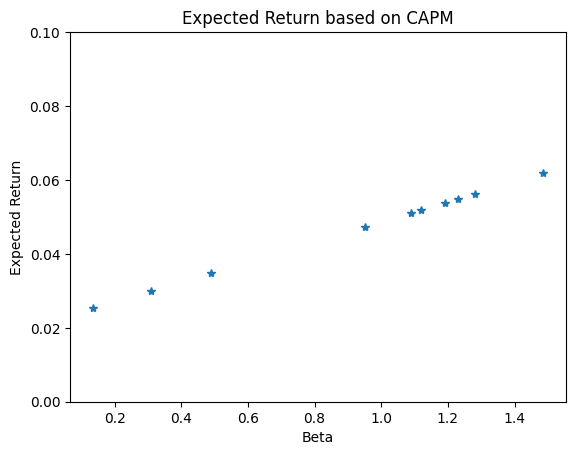

In [44]:
# plut expected return based on CAPM and the given beta
# y axis = expected return
# x axis = beta

import matplotlib.pyplot as plt

# plot the expected return based on CAPM and the given beta
plt.plot(df_stat['beta_eq'], df_stat['expected_return'], '*')
# set the y axis limit
plt.ylim(0, 0.1)
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('Expected Return based on CAPM')
plt.show()
